In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

# Data From First Source

In [2]:
df = pd.read_csv('data/Raw_data/data1.csv')

In [3]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [4]:
df.tail()

,URLs,Headline,Body,Label
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1
4008,http://beforeitsnews.com/u-s-politics/2017/10/...,Vice President Mike Pence Leaves NFL Game Beca...,Vice President Mike Pence Leaves NFL Game Beca...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB


In [6]:
df[df['Body'].isnull()]

,URLs,Headline,Body,Label
247,https://www.nytimes.com/interactive/2017/10/12...,Read Al Green's Resolution to Impeach Donald T...,NaN,1
269,https://www.nytimes.com/2017/10/10/magazine/th...,The Prophet of Germany’s New Right,NaN,1
325,http://edition.cnn.com/interactive/2017/10/mid...,"Hunting the terror group from 70,000ft",NaN,1
395,http://beforeitsnews.com/entertainment/2017/09...,10 Shocking Facts About Porn You Probably Didn...,NaN,0
509,http://beforeitsnews.com/sports/2017/10/105-tr...,"10/5 TRS-PNC Park: Bucs Win in '71, '79; Lose ...",NaN,0
882,http://beforeitsnews.com/sports/2017/10/103-ha...,"10/3 Happenings: HBD Cap, Johnny, Dog, Tomato,...",NaN,0
973,http://beforeitsnews.com/sports/2017/10/ravens...,Ravens @ Raiders - Wednesday,NaN,0
981,http://beforeitsnews.com/sports/2017/10/104-tr...,10/4 TRS-PNC Park Era: Reds Thump Buc 3x in Pl...,NaN,0
1006,https://www.activistpost.com/2017/09/scientist...,A Comprehensive Database on Chemtrails and Wea...,NaN,0
1133,http://beforeitsnews.com/sports/2017/10/106-hb...,"10/6: HBD Eddie, Tom, Gene, Jeff, Joel & Radha...",NaN,0


In [7]:
df.dropna(inplace=True,axis=0) # dropping null values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3988 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      3988 non-null   object
 1   Headline  3988 non-null   object
 2   Body      3988 non-null   object
 3   Label     3988 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 155.8+ KB


<AxesSubplot:xlabel='Label', ylabel='count'>

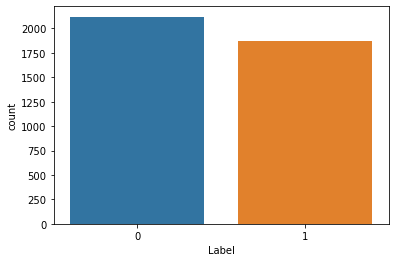

In [9]:
# class imbalance
sns.countplot(x= df['Label'])

In [10]:
df.drop(columns=['URLs'],inplace = True)

In [11]:
df.columns

Index(['Headline', 'Body', 'Label'], dtype='object')

In [12]:
df.head()

,Headline,Body,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [13]:
df.rename(columns = {'Headline' : 'title','Body':'text'},inplace=True)

In [14]:
df.head()

,title,text,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [15]:
df[df['text']=='']

,title,text,Label


In [16]:
df[df['title']=='']

,title,text,Label


In [17]:
df.to_csv('data/cleaned_data/cleaned_data1.csv',index=False)

In [18]:
#

# Data from second source

In [19]:
#

# real Data

In [20]:
real = pd.read_csv('data/Raw_data/True_data2.csv')

In [21]:
real.shape

(21417, 4)

In [22]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [23]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [24]:
real['Label'] = 1

In [25]:
real.drop(columns=['subject','date'],inplace=True)

In [26]:
real.drop(index=[8247,8970 ],axis=0,inplace=True)

In [27]:
def sep(x):
    k = x.split('-')
    return k[1]

In [28]:
real['text'] = real['text'].apply(sep)

In [29]:
real

,title,text,Label
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,1
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,1
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,1
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,1
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Don...,1
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory a...",1
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet,1
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Pa...,1


In [30]:
real[real['text']=='']

,title,text,Label
5761,Factbox: Trump on Twitter (Feb 1) - Rex Tiller...,,1
6026,Factbox: Trump on Twitter (Jan 25) - ABC inter...,,1


# Fake Data

In [31]:
fake = pd.read_csv('data/Raw_data/Fake_data2.csv')

In [32]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [33]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [34]:
fake.drop(columns=['subject','date'],inplace=True)

In [35]:
fake.head()

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...


In [36]:
fake['Label'] = 0

In [37]:
fake.head()

,title,text,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [38]:
fake[fake['text']=='']

,title,text,Label


In [39]:
data1 = pd.concat([real,fake]).reset_index(drop=True)

In [40]:
data1 = data1.sample(frac=1).reset_index(drop=True)

In [41]:
data1

,title,text,Label
0,UNIV Of WI Chancellor Contacts Police After No...,Is anyone else concerned that the Left was abl...,0
1,"While We Were Sleeping, Trump Declared Civil War",I woke up this morning completely unfazed over...,0
2,"BREAKING: GA, KY, WV Confirm They Suspect Obam...",Georgia s secretary of state has claimed the D...,0
3,U.S. Air Force Advertises Martin Luther King ...,Put this one under Shit You Just Can t Make U...,0
4,The Walls Close In On Trump As His Disgraced ...,"Donald Trump s scandal-ridden, chaotic White H...",0
...,...,...,...
44891,OBAMA WILL GIVE AWAY FREE INTERNET (To Those H...,Don t turn off your paid internet service quit...,0
44892,MEGYN KELLY CONTINUES HER OBSESSION With Trump...,"We can t be certain, but it almost looked like...",0
44893,The Gay Men Killed In Fl. Shooting Would Not ...,Blood donations are urgently needed in the Orl...,0
44894,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,0


In [42]:
data1.drop(index = data1[data1['text']==''].index,inplace=True)

In [43]:
data1[data1['title']=='']

,title,text,Label


In [44]:
data1[data1['text']=='']

,title,text,Label


In [45]:
data1.to_csv('data/cleaned_data/cleaned_data2.csv',index=False)